### Importing libraries

In [1]:
!pip install bokeh
!pip install pyvis
!apt-get install graphviz libgraphviz-dev pkg-config -y
!pip install pygraphviz 
import numpy as np  
import pandas as pd 
from matplotlib import animation
import matplotlib.pyplot as plt 
import networkx as nx
from operator import itemgetter
from networkx.drawing.nx_agraph import graphviz_layout
from pyvis.network import Network
import pyvis
import scipy.stats
import bokeh

     |████████████████████████████████| 428 kB 849 kB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.0.2
    Uninstalling tornado-5.0.2:
      Successfully uninstalled tornado-5.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-git 0.11.0 requires nbdime<2.0.0,>=1.1.0, but you have nbdime 2.1.0 which is incompatible.



pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 23 no

# Introduction and Purposes
<hr>

* #### After seeing <a href="https://www.linkedin.com/in/kcalizadeh/">Kourosh's</a> philosophy <a href="https://www.kaggle.com/kouroshalizadeh/history-of-philosophy">dataset</a> and <a href="http://philosophydata.com/index.html">project</a> I have fulled with different ideas. I believe that analysis of the history of philosophy can be quite beneficial to both researchers and people who are interested in philosophy. We will make our analysis with the scientific method. One of the strongest sides of science is the ability to make predictions about the future. In section one, we will make predictions about the not existing data, and we will make predictions about existing data while questioning whether the result compatible with our prior beliefs.

#### 1. Our purpose here is to investigate the relationships of philosophers with graph theory. We will use different measurement methods to extract different pieces of information. My first work's name on this data was <a href="https://www.kaggle.com/azxc9595/visual-graphs-of-philosophy">"Visual Graphs of Philosophy,"</a>  but this one's name is "Graph Theory and Philosophy." This title difference is on purpose because, in that notebook, we have just created a network and visualized it in the aspect of graphs. In there, the purpose was just illustrating the relationships, but in this notebook, we will not just illustrate the relationships; we will also extract different pieces of information from these relations. (This is the point where we will use graph theory.) 

#### 2. Then, we will create interactive big graphs containing all the philosophers extracted from the dataset. We will create two graphs like this with two different libraries. (Bokeh & Pyviz)


* #####  Note: I have copied the nodes and edges from <a href="https://www.kaggle.com/azxc9595/visual-graphs-of-philosophy">"Visual Graphs of Philosophy,"</a> 

# Centrality Measures
<hr>

In [2]:
Nodes=['Plato','Aristotle','John Locke','David Hume','George Berkeley','Benedict de Spinoza','Gottfried W. Leibniz','Rene Descartes','Nicolas Malebranche','Bertrand Russell','G.E. Moore','Ludwig Wittgenstein','David Kellogg Lewis','Willard Van Orman Quine',
 'Karl Popper','Saul Kripke','Michel Foucault','Jacques Derrida','Gilles Deleuze','Maurice Merleau-Ponty','Edmund Husserl','Martin Heidegger','Immanuel Kant','Johann G. Fichte','Georg W.F. Hegel','Karl Marx','Vladimir Lenin','Adam Smith','David Ricardo',
 'John N. Keynes','Epictetus','Marcus Aurelius','Friedrich Nietzsche','Mary Wollstonecraft','Simone de Beauvoir','Angela Davis','Socrates','Phaedo','Diodorus Cronus','Protagoras','Zeno of Elea','Parmenides','Antisthenes','Damascius','Lysis of Tarentum','Peregrinus Proteus','Gorgias of Leontini',
'Dion Chrysostom','David Ross','Democritus','Melissus of Samos','Anaxagoras','Allan Bloom','Anaximander','Harold H. Joachim','Empedocles', 'Leucippus','Thales of Miletus', 'Heraclitus',
 'Diogenes of Babylon',
 'Solomon Formstecher',
 'Thomas Hobbes',
 'Pierre Bayle',
 'Pierre Nicole',
 'Marcus Tullius Cicero',
 'Pierre T. de Chardin',
 'Cleanthes',
 'Epicurus',
 'Carneades',
 'Sextus Empiricus',
 'John Philoponus',
 'Avicenna',
'Lucius A. Seneca',
 'Henri Bergson',
 'William James',
 'John S. Haldane',
 'John Dewey',
 'Franz Brentano',
 'Alfred N. Whitehead',
 'Thomas Reid',
 'T.H. Green',
 'Edward Westermarck',
 'St. Augustine',
 'Rudolf Carnap',
 'Hilary Putnam',
 'Bernard Williams',
 'Noam Chomsky',
 'Peter Strawson',
 'C. I. Lewis',
 'John L. Austin',
 'Peter Railton',
'Carl G. Hempel',
 'Richard Rorty',
 'William Whewell',
 'Ernst Mach',
 'Otto Neurath',
 'Charles S. Peirce',
 'Hans Reichenbach',
 'Arthur S. Eddington',
 'Werner Heisenberg',
 'Francis Bacon',
 'John Searle',
 'John Stuart Mill',
 'Donald Davidson',
 'Robert L. Martin',
 'Henry Sidgwick',
 'Gottlob Frege',
 'R.G. Collingwood',
 'Ralph B. Perry',
 'Daniel C. Dennett',
 'Pierre-J.-G. Cabanis',
 'Étienne B. de Condillac',
 'Marquis de Condorcet',
 'Denis Diderot',
 'Giambattista d. Porta',
 'Tommaso Campanella',
 'Petrus Ramus',
 'J.J. Rousseau',
 'Claude Buffier',
 'Maximus the Greek',
 'Wilhelm Dilthey',
 'Proclus',
 'Novalis',
 'Désiré-Joseph Mercier',
 'Arthur Schopenhauer',
 'Max Scheler',
 'Jean-Paul Sartre',
 'Léon Brunschvicg',
 'Ernst Cassirer',
 'Karl Jaspers',
 'Ernest Nagel',
 'Kuno Fischer',
 'Edith Stein',
 'Simplicius of Cilicia',
 'Joseph Priestley',
 'Edmund Burke',
 'Friedrich H. Jacobi',
 'Reinhold Niebuhr',
 'Christian, b.v. Wolff',
 'Diogenes',
 'James F. Ferrier',
 'Friedrich Engels',
 'Samuel Bailey',
 'William Hamilton',
 'Adam Ferguson',
 'Isaac of Stella',
 'Frederic Harrison',
 'Henry of Ghent',
 'Theophrastus',
 'Pythagoras',
 'Agrippa',
 'Ernest Renan',
 'Friedrich Schiller',
 'Karl C. F. Krause',
 'Friedrich W.J. von Schelling',
 'Thomas Brown',
 'Wollstonecraft',
 'Auguste Comte',
 'Judith Butler',
 'Davis',
 'Susan B. Anthony',
 'Davis', 'Elizabeth C. Stanton']



JustAuthor=['Plato',
 'Aristotle',
 'John Locke',
 'David Hume',
'George Berkeley',
 'Benedict de Spinoza',
 'Gottfried W. Leibniz',
 'Rene Descartes',
 'Nicolas Malebranche',
 'Bertrand Russell',
 'G.E. Moore',
 'Ludwig Wittgenstein',
 'David Kellogg Lewis',
 'Willard Van Orman Quine',
 'Karl Popper',
 'Saul Kripke',
 'Michel Foucault',
 'Jacques Derrida',
 'Gilles Deleuze',
 'Maurice Merleau-Ponty',
 'Edmund Husserl',
 'Martin Heidegger',
 'Immanuel Kant',
 'Johann G. Fichte',
 'Georg W.F. Hegel',
 'Karl Marx',
 'Vladimir Lenin',
 'Adam Smith',
 'David Ricardo',
 'John N. Keynes',
 'Epictetus',
 'Marcus Aurelius',
 'Friedrich Nietzsche',
 'Mary Wollstonecraft',
 'Simone de Beauvoir',
 'Angela Davis']



Edges=[('Plato', 'Socrates', 618),
 ('Plato', 'Phaedo', 8),
 ('Plato', 'Plato', 4),
 ('Plato', 'Diodorus Cronus', 2),
 ('Plato', 'Protagoras', 27),
 ('Plato', 'Zeno of Elea', 1),
 ('Plato', 'Parmenides', 8),
 ('Plato', 'Antisthenes', 1),
 ('Plato', 'Damascius', 1),
 ('Plato', 'Lysis of Tarentum', 4),
 ('Plato', 'Peregrinus Proteus', 1),
 ('Plato', 'Gorgias of Leontini', 14),
 ('Plato', 'Dion Chrysostom', 1),
 ('David Ross','Aristotle', 19),
 ('Aristotle', 'Plato', 3),
 ('Aristotle', 'Democritus', 6),
 ('Aristotle', 'Melissus of Samos', 1),
 ('Aristotle', 'Anaxagoras', 6),
 ('Aristotle', 'Allan Bloom', 1),
 ('Aristotle', 'Anaximander', 1),
 ('Aristotle', 'Harold H. Joachim', 1),
 ('Aristotle', 'Empedocles', 7),
 ('Aristotle', 'Leucippus', 1),
 ('Aristotle', 'Thales of Miletus', 3),
 ('Aristotle', 'Socrates', 3),
 ('Aristotle', 'Heraclitus', 1),
 ('Aristotle', 'Diogenes of Babylon', 1),
 ('Aristotle', 'Dion Chrysostom', 1),
 ('John Locke', 'Solomon Formstecher', 1),
 ('John Locke', 'Socrates', 2),
 ('George Berkeley', 'Thomas Hobbes', 1),
 ('Gottfried W. Leibniz', 'Pierre Bayle', 34),
 ('Gottfried W. Leibniz', 'Rene Descartes', 4),
 ('Gottfried W. Leibniz', 'Pierre Nicole', 1),
 ('Gottfried W. Leibniz', 'Marcus Tullius Cicero', 2),
 ('Gottfried W. Leibniz', 'Pierre T. de Chardin', 1),
 ('Gottfried W. Leibniz', 'Cleanthes', 1),
 ('Gottfried W. Leibniz', 'Benedict de Spinoza', 1),
 ('Gottfried W. Leibniz', 'Aristotle', 1),
 ('Gottfried W. Leibniz', 'Epicurus', 1),
 ('Gottfried W. Leibniz', 'Carneades', 1),
 ('Gottfried W. Leibniz', 'Heraclitus', 1),
 ('Gottfried W. Leibniz', 'Sextus Empiricus', 3),
 ('Nicolas Malebranche', 'Plato', 6),
 ('Nicolas Malebranche', 'John Philoponus', 1),
 ('Nicolas Malebranche', 'Avicenna', 2),
 ('Nicolas Malebranche', 'Lucius A. Seneca', 4),
 ('Nicolas Malebranche', 'Rene Descartes', 3),
 ('Nicolas Malebranche', 'Aristotle', 3),
 ('Bertrand Russell', 'Henri Bergson', 1),
 ('Bertrand Russell', 'William James', 2),
 ('Bertrand Russell',  'John S. Haldane', 2),
 ('Bertrand Russell', 'John Dewey', 1),
 ('Bertrand Russell', 'David Hume', 2),
 ('Bertrand Russell', 'Franz Brentano', 1),
 ('Bertrand Russell', 'Rene Descartes', 1),
 ('Bertrand Russell', 'John Locke', 1),
 ('Bertrand Russell', 'Alfred N. Whitehead', 1),
 ('Bertrand Russell', 'Immanuel Kant', 2),
 ('G.E. Moore', 'George Berkeley', 3),
 ('G.E. Moore', 'Thomas Reid', 1),
 ('G.E. Moore', 'T.H. Green', 1),
 ('G.E. Moore', 'David Hume', 1),
 ('G.E. Moore', 'Harold H. Joachim', 1),
 ('G.E. Moore', 'Edward Westermarck', 1),
 ('Ludwig Wittgenstein', 'St. Augustine', 1),
 ('Ludwig Wittgenstein', 'William James', 1),
 ('Ludwig Wittgenstein', 'G.E. Moore', 2),
 ('David Kellogg Lewis', 'Willard Van Orman Quine', 4),
 ('David Kellogg Lewis', 'Rudolf Carnap', 2),
 ('David Kellogg Lewis', 'Saul Kripke', 5),
 ('David Kellogg Lewis', 'David Kellogg Lewis', 3),
 ('David Kellogg Lewis', 'Hilary Putnam', 1),
 ('David Kellogg Lewis', 'Bernard Williams', 1),
 ('David Kellogg Lewis', 'Noam Chomsky', 1),
 ('David Kellogg Lewis', 'Peter Strawson', 1),
 ('David Kellogg Lewis', 'C. I. Lewis', 1),
 ('David Kellogg Lewis', 'David Ross', 1),
 ('David Kellogg Lewis', 'John L. Austin', 1),
 ('David Kellogg Lewis', 'Peter Railton', 1),
 ('Willard Van Orman Quine', 'Bertrand Russell', 3),
 ('Willard Van Orman Quine', 'Rudolf Carnap', 5),
 ('Willard Van Orman Quine', 'C. I. Lewis', 1),
 ('Willard Van Orman Quine', 'Willard Van Orman Quine', 1),
 ('Willard Van Orman Quine', 'Carl G. Hempel', 1),
 ('Willard Van Orman Quine', 'Gottfried W. Leibniz', 1),
 ('Willard Van Orman Quine', 'George Berkeley', 1),
 ('Willard Van Orman Quine', 'David Hume', 1),
 ('Willard Van Orman Quine', 'Alfred N. Whitehead', 1),
 ('Willard Van Orman Quine', 'David Kellogg Lewis', 1),
 ('Karl Popper', 'Richard Rorty', 1),
 ('Karl Popper','Gottfried W. Leibniz', 1),
 ('Karl Popper', 'George Berkeley', 1),
 ('Karl Popper', 'William Whewell', 1),
 ('Karl Popper', 'John N. Keynes', 2),
 ('Karl Popper', 'Ludwig Wittgenstein', 6),
 ('Karl Popper', 'Ernst Mach', 1),
 ('Karl Popper', 'Rudolf Carnap', 3),
 ('Karl Popper', 'Otto Neurath', 2),
 ('Karl Popper', 'Alfred N. Whitehead', 1),
 ('Karl Popper',  'Charles S. Peirce', 1),
 ('Karl Popper', 'Hans Reichenbach', 2),
 ('Karl Popper', 'Arthur S. Eddington', 1),
 ('Karl Popper', 'Werner Heisenberg', 2),
 ('Karl Popper', 'Francis Bacon', 1),
 ('Saul Kripke', 'John Searle', 2),
 ('Saul Kripke', 'David Kellogg Lewis', 3),
 ('Saul Kripke', 'Peter Strawson', 2),
 ('Saul Kripke', 'Bertrand Russell', 7),
 ('Saul Kripke', 'Willard Van Orman Quine', 3),
 ('Saul Kripke', 'John Stuart Mill', 1),
 ('Saul Kripke', 'Rene Descartes', 3),
 ('Saul Kripke', 'Donald Davidson', 2),
 ('Saul Kripke', 'G.E. Moore', 1),
 ('Saul Kripke','Alfred N. Whitehead', 1),
 ('Saul Kripke', 'Robert L. Martin', 1),
 ('Saul Kripke', 'Marcus Tullius Cicero', 1),
 ('Saul Kripke', 'Hilary Putnam', 1),
 ('Saul Kripke', 'Henry Sidgwick', 2),
 ('Saul Kripke', 'Adam Smith', 1),
 ('Saul Kripke', 'Gottlob Frege', 2),
 ('Saul Kripke', 'Ludwig Wittgenstein', 2),
 ('Saul Kripke', 'Carl G. Hempel', 1),
 ('Saul Kripke', 'R.G. Collingwood', 1),
 ('Saul Kripke',  'Ralph B. Perry', 1),
 ('Saul Kripke', 'Daniel C. Dennett', 1),
 ('Michel Foucault', 'Pierre-J.-G. Cabanis', 10),
 ('Michel Foucault', 'Étienne B. de Condillac', 12),
 ('Michel Foucault','Marquis de Condorcet',1),
 ('Michel Foucault', 'Pierre Bayle', 3),
 ('Michel Foucault', 'Denis Diderot', 4),
 ('Michel Foucault', 'Friedrich Nietzsche', 6),
 ('Michel Foucault', 'Rene Descartes', 9),
 ('Michel Foucault', 'Jacques Derrida', 4),
 ('Michel Foucault', 'Giambattista d. Porta', 3),
 ('Michel Foucault', 'Tommaso Campanella', 2),
 ('Michel Foucault', 'Petrus Ramus', 1),
 ('Michel Foucault', 'George Berkeley', 5),
 ('Michel Foucault', 'Nicolas Malebranche', 1),
 ('Michel Foucault', 'Francis Bacon', 1),
 ('Michel Foucault', 'J.J Rousseau', 5),
 ('Michel Foucault', 'Claude Buffier', 1),
 ('Michel Foucault', 'Thomas Hobbes', 2),
 ('Michel Foucault', 'Immanuel Kant', 2),
 ('Michel Foucault', 'David Hume', 1),
 ('Michel Foucault', 'John Locke', 3),
 ('Michel Foucault', 'Gottfried W. Leibniz', 1),
 ('Michel Foucault', 'Adam Smith', 1),
 ('Michel Foucault', 'Maximus the Greek', 2),
 ('Michel Foucault', 'Georg W.F. Hegel', 1),
 ('Jacques Derrida', 'Richard Rorty', 1),
 ('Jacques Derrida', 'Michel Foucault', 2),
 ('Jacques Derrida', 'Rene Descartes', 3),
 ('Jacques Derrida', 'Friedrich Nietzsche', 1),
 ('Jacques Derrida', 'Martin Heidegger', 2),
 ('Jacques Derrida', 'Edmund Husserl', 4),
 ('Jacques Derrida', 'Wilhelm Dilthey', 1),
 ('Jacques Derrida', 'Georg W.F. Hegel', 3),
 ('Gilles Deleuze','Gottfried W. Leibniz', 3),
 ('Gilles Deleuze', 'Martin Heidegger', 1),
 ('Gilles Deleuze', 'Immanuel Kant', 2),
 ('Gilles Deleuze', 'Proclus', 1),
 ('Gilles Deleuze', 'Novalis', 1),
 ('Gilles Deleuze', 'Henri Bergson', 1),
 ('Gilles Deleuze', 'Désiré-Joseph Mercier', 1),
 ('Gilles Deleuze', 'Karl Marx', 1),
 ('Gilles Deleuze', 'William James', 1),
 ('Gilles Deleuze', 'Arthur Schopenhauer', 1),
 ('Maurice Merleau-Ponty', 'Max Scheler', 4),
 ('Maurice Merleau-Ponty', 'Henri Bergson', 2),
 ('Maurice Merleau-Ponty', 'Edmund Husserl', 7),
 ('Maurice Merleau-Ponty', 'Jean-Paul Sartre', 2),
 ('Maurice Merleau-Ponty', 'Denis Diderot', 1),
 ('Maurice Merleau-Ponty', 'Léon Brunschvicg', 1),
 ('Maurice Merleau-Ponty', 'Ernst Cassirer', 1),
 ('Maurice Merleau-Ponty', 'Karl Jaspers', 2),
 ('Maurice Merleau-Ponty', 'Werner Heisenberg', 2),
 ('Maurice Merleau-Ponty', 'Ernest Nagel', 1),
 ('Maurice Merleau-Ponty', 'Kuno Fischer', 3),
 ('Maurice Merleau-Ponty', 'Edith Stein', 1),
 ('Maurice Merleau-Ponty', 'Immanuel Kant', 1),
 ('Maurice Merleau-Ponty', 'Rene Descartes', 2),
 ('Maurice Merleau-Ponty', 'Martin Heidegger', 5),
 ('Edmund Husserl', 'Rene Descartes', 2),
 ('Edmund Husserl', 'Benedict de Spinoza', 1),
 ('Edmund Husserl', 'Immanuel Kant', 1),
 ('Edmund Husserl', 'David Hume', 1),
 ('Edmund Husserl', 'Wilhelm Dilthey', 1),
 ('Martin Heidegger', 'Plato', 1),
 ('Martin Heidegger', 'Max Scheler', 2),
 ('Martin Heidegger', 'Aristotle', 1),
 ('Martin Heidegger', 'Immanuel Kant', 1),
 ('Martin Heidegger','Georg W.F. Hegel', 4),
 ('Martin Heidegger', 'Rene Descartes', 1),
 ('Martin Heidegger', 'Friedrich Nietzsche', 1),
 ('Martin Heidegger', 'Simplicius of Cilicia', 1),
 ('Immanuel Kant', 'Joseph Priestley', 1),
 ('Immanuel Kant', 'Immanuel Kant', 2),
 ('Immanuel Kant', 'Anaxagoras', 1),
 ('Immanuel Kant', 'Edmund Burke', 1),
 ('Immanuel Kant', 'David Hume', 1),
 ('Immanuel Kant', 'Plato', 2),
 ('Immanuel Kant', 'Benedict de Spinoza', 1),
 ('Immanuel Kant', 'John Locke', 1),
 ( 'Johann G. Fichte',  'Johann G. Fichte', 4),
 ( 'Johann G. Fichte', 'Immanuel Kant', 3),
 ('Georg W.F. Hegel', 'Aristotle', 4),
 ('Georg W.F. Hegel',  'Friedrich H. Jacobi', 3),
 ('Georg W.F. Hegel', 'Benedict de Spinoza', 4),
 ('Georg W.F. Hegel', 'Reinhold Niebuhr', 2),
 ('Georg W.F. Hegel',  'Johann G. Fichte', 4),
 ('Georg W.F. Hegel', 'Parmenides', 2),
 ('Georg W.F. Hegel', 'Christian, b.v. Wolff', 1),
 ('Georg W.F. Hegel', 'Immanuel Kant', 2),
 ('Georg W.F. Hegel', 'Pierre Bayle', 1),
 ('Georg W.F. Hegel', 'Gottfried W. Leibniz', 2),
 ('Georg W.F. Hegel','Georg W.F. Hegel', 1),
 ('Georg W.F. Hegel', 'Plato', 1),
 ('Georg W.F. Hegel' , 'Diogenes', 1),
 ('Karl Marx',  'James F. Ferrier', 2),
 ('Karl Marx', 'Friedrich Engels', 2),
 ('Karl Marx', 'Georg W.F. Hegel', 1),
 ('Karl Marx', 'Samuel Bailey', 2),
 ('Karl Marx', 'Adam Smith', 4),
 ('Karl Marx', 'William Hamilton', 1),
 ('Karl Marx', 'Adam Ferguson', 1),
 ('Karl Marx', 'Karl Marx', 1),
 ('Karl Marx', 'Isaac of Stella', 1),
 ('Karl Marx', 'John Locke', 1),
 ('Karl Marx', 'Frederic Harrison', 1),
 ('Vladimir Lenin', 'Karl Marx', 6),
 ('Vladimir Lenin', 'Friedrich Engels', 3),
 ('Adam Smith', 'Aristotle', 2),
 ('Adam Smith', 'Carneades', 1),
 ('Adam Smith', 'Henry of Ghent', 1),
 ('Adam Smith', 'Protagoras', 1),
 ('Marcus Aurelius', 'Theophrastus', 1),
 ('Marcus Aurelius', 'Pythagoras', 1),
 ('Marcus Aurelius', 'Agrippa', 1),
 ('Friedrich Nietzsche', 'Aristotle', 2),
 ('Friedrich Nietzsche', 'Socrates', 2),
 ('Friedrich Nietzsche', 'Ernest Renan', 2),
 ('Friedrich Nietzsche', 'J.J Rousseau', 1),
 ('Friedrich Nietzsche', 'Plato', 3),
 ('Friedrich Nietzsche', 'Friedrich Schiller', 2),
 ('Friedrich Nietzsche', 'Thomas Hobbes', 1),
 ('Friedrich Nietzsche', 'Karl C. F. Krause', 1),
 ('Friedrich Nietzsche',  'Friedrich W.J. von Schelling', 1),
 ('Friedrich Nietzsche', 'Benedict de Spinoza', 1),
 ('Friedrich Nietzsche', 'Lucius A. Seneca', 1),
 ('Friedrich Nietzsche', 'Immanuel Kant', 1),
 ('Friedrich Nietzsche', 'Arthur Schopenhauer', 1),
 ('Friedrich Nietzsche', 'Gottfried W. Leibniz', 1),
 ('Friedrich Nietzsche', 'Empedocles', 1),
 ('Friedrich Nietzsche', 'T.H. Green', 1),
 ('Friedrich Nietzsche', 'Thomas Brown', 1),
 ('Wollstonecraft', 'J.J Rousseau', 1),
 ('Simone de Beauvoir', 'Denis Diderot', 1),
 ('Simone de Beauvoir', 'Karl Marx', 1),
 ('Simone de Beauvoir','Georg W.F. Hegel', 2),
 ('Simone de Beauvoir', 'Jean-Paul Sartre', 2),
 ('Simone de Beauvoir', 'Plato', 2),
 ('Simone de Beauvoir', 'Auguste Comte', 2),
 ('Simone de Beauvoir', 'Judith Butler', 1),
 ('Simone de Beauvoir',
  'Marquis de Condorcet',
  1),
 ('Simone de Beauvoir', 'Aristotle', 1),
 ('Simone de Beauvoir', 'J.J Rousseau', 1),
 ('Davis', 'Susan B. Anthony', 4),
 ('Davis', 'Elizabeth C. Stanton', 1)]

#### <a href="https://en.wikipedia.org/wiki/Centrality">"In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph." (Wikipedia)</a>  
##### However, importance is a dependent term, important according to what? Therefore, when we look at the centrality measures, we should ask, "What characterizes an important vertex?" After asking this, we can use centrality measures and see which node(philosopher) is important according to which criteria. 
##### We will use different measures by dividing them into two sections because directed graphs do not support some algorithms. 

* Since our data is not comprehensive enough to see all the philosophy history, we should use the Bayesian approach. By this, I mean that when we see the data, we should update our beliefs rather than destroy old ones and create new ones. For example, let's say we think the most referred philosopher in history is Socrates, but we do not have such a strong belief about this. When data shows the most referred philosopher as Immanuel Kant, we should update our belief about Socrates being the most referred philosopher in a direction that we are less sure about this belief. In the same case, if we were thinking the most referred philosopher is Immanuel Kant, we should update our belief about this in a direction that we are more sure about our belief.

* This approach is illustrated in the following picture. In the beginning, we have our prior beliefs. When we see the data (evidence), we update our beliefs in the direction of data rather than having a new belief as same as the data (evidence). This updated belief of ours is our posterior belief.
![Bayesian approach](https://www.analyticsvidhya.com/wp-content/uploads/2016/06/12.jpg)

## Directed graph part

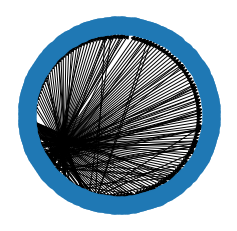

In [3]:
######### Creating the graph #########
G = nx.DiGraph()
G.add_nodes_from(Nodes)
G.add_weighted_edges_from(Edges)
 
fig, axs = plt.subplots(figsize=(4,4))
pos = nx.shell_layout(G)
nx.draw(G,pos=pos,with_labels =False,width=True)

### Degree Centrality
<hr>

##### <a href="https://link.springer.com/referenceworkentry/10.1007%2F978-1-4419-9863-7_935#:~:text=Degree%20centrality%20is%20defined%20as,%2C%20namely%2C%20indegree%20and%20outdegree">Definition:</a> 
*Degree centrality is defined as the number of links incident upon a node (i.e., the number of ties that a node has). If the network is directed (meaning that ties have direction), then two separate measures of degree centrality are defined, namely, indegree and outdegree. Indegree is a count of the number of ties directed to the node (head endpoints) and outdegree is the number of ties that the node directs to others (tail endpoints). In such cases, the degree is the sum of indegree and outdegree.*

*With our approach, these terms will correspond to different phenomena.* 
* We can see degree centrality as the "number of citations upon a philosopher."
* We can see in-degree centrality as the "number of times a philosopher has been referred."
* We can see out-degree centrality as the "number of times a philosopher has referred."

*Since our graph is directed, we will look at indegree and outdegree scores.  (I think degree centrality, in this point, does not have a value of information since it's just the sum of indegree and outdegree score.)*
* Note: Since we do not have all the philosophers in history, our centrality measures will give a part of the image rather than the whole. However, I believe if we would have all the philosophers and their books in our dataset, this would reflect the exact reality.

In [4]:
DC=nx.algorithms.centrality.degree_centrality(G)
InDC=nx.algorithms.centrality.in_degree_centrality(G)
OutDC=nx.algorithms.centrality.out_degree_centrality(G)
CentralityFrame=pd.DataFrame([(a,b,c,d) for a,b,c,d in zip(DC.keys(),DC.values(),InDC.values(),OutDC.values())],columns=["Node","Degree_C. Score","InDegree_C. Score","OutDegree_C. Score"]) 
CentralityFrame

,Node,Degree_C. Score,InDegree_C. Score,OutDegree_C. Score
0,Plato,0.129630,0.049383,0.080247
1,Aristotle,0.135802,0.049383,0.086420
2,John Locke,0.037037,0.024691,0.012346
3,David Hume,0.037037,0.037037,0.000000
4,George Berkeley,0.030864,0.024691,0.006173
...,...,...,...,...
158,Judith Butler,0.006173,0.006173,0.000000
159,Davis,0.012346,0.000000,0.012346
160,Susan B. Anthony,0.006173,0.006173,0.000000
161,Elizabeth C. Stanton,0.006173,0.006173,0.000000


#### Most referred Philosophers List 

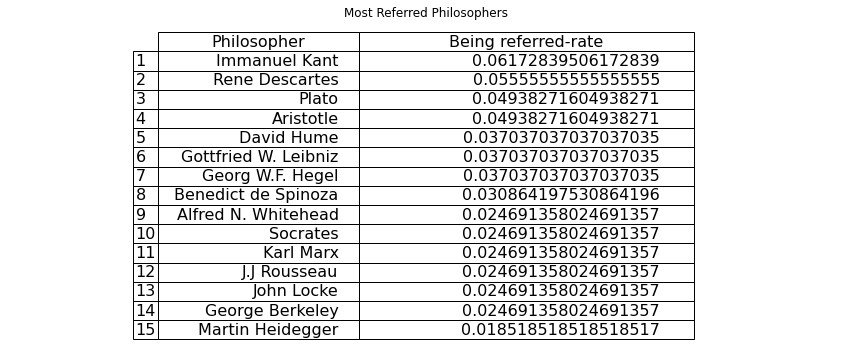

In [5]:
Most_referred=CentralityFrame[["Node","InDegree_C. Score"]].sort_values(by=["InDegree_C. Score"],ascending=False).head(15)

fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(111)

the_table = plt.table(cellText = Most_referred.values,
          rowLabels =  range(1,len(Most_referred.index)+1),
          colLabels =["Philosopher","Being referred-rate"],
          loc = "center",
         colWidths = [0.15, 0.25],
         
         )

ax.set_title("Most Referred Philosophers")
the_table.set_fontsize(20)
the_table.scale(1.6, 1.6)
ax.axis("off");

* These results are somewhat justifying my prior beliefs. Usually, whenever a philosopher talks about the Enlightenment, we see the names Immanuel Kant and Descartes. Since these two philosophers are so central for describing the Enlightenment, my belief about seeing these philosophers as the most referenced philosophers increases; other philosophers' place on this ranking, for me, is plausible too. For me, this graph is just counter-intuitive for Socrates. I have expected a higher "being referred-rate" for him, so my belief about his referenced rate updated, now I think Socrates might not be referenced as much as I think.    

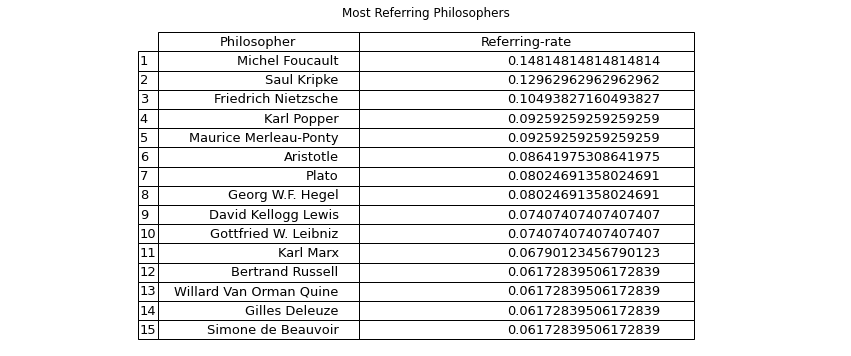

In [6]:
Most_referring=CentralityFrame[["Node","OutDegree_C. Score"]].sort_values(by=["OutDegree_C. Score"],ascending=False).head(15)
 
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(111)

the_table = plt.table(cellText = Most_referring.values,
          rowLabels =  range(1,len(Most_referring.index)+1),
          colLabels =["Philosopher","Referring-rate"],
          loc = "center",
         colWidths = [0.15, 0.25],
         
         )

ax.set_title("Most Referring Philosophers")
the_table.set_fontsize(20)
the_table.scale(1.6, 1.6)
ax.axis("off");

* And this is our most referring list. Different kinds of information can be extracted from it, like, "Michel Foucault was a thinker who refers other a lot." 



* Now, we will investigate another question with these two data frames. The question is, "Is there a correlation between referring and being referred?"

p-value for pearson correlation:  0.0001455746855169387


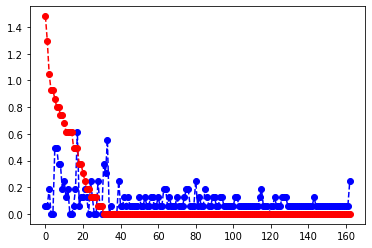

In [7]:
Being_referred=CentralityFrame["InDegree_C. Score"].values
Referring=CentralityFrame["OutDegree_C. Score"].values

Array=np.array(sorted(zip(Being_referred,Referring),key=itemgetter(1),reverse=True))
Sorted_B_ref,Sorted_ref=Array[:,0],Array[:,1]
plt.plot(Sorted_B_ref*10,'--bo')
plt.plot(Sorted_ref*10,'--ro')
 
print("p-value for pearson correlation: ",scipy.stats.pearsonr(Sorted_B_ref, Sorted_ref)[1])

* As it turns out, there isn't a significant effect. Therefore, we can't say these two data correlate (With statistics language, we can't say two distributions are coming from different populations). However, we can't also say there is no effect. Our data might be not big enough to show us the correlation. For now, we will leave this, but as data gets bigger, we should keep in mind this kind of correlation might exist, and we should keep our eyes open for it.

### <a href="https://en.wikipedia.org/wiki/PageRank">PageRank Algorithm </a>

<hr>

##### Background Information
* This is an algorithm I especially like. It's a beautiful way to show how linear algebra (eigenbasis) is used in action. For those who are interested in mathematics behind it, there is a very good <a href="https://johngiorgi.github.io/mathematics-for-machine-learning/linear_algebra/week_5/"> documentation</a> which is taken from <a href="https://www.coursera.org/specializations/mathematics-machine-learning"> Mathematics for Machine L. Course by Imperial College London</a>.
 
* How PageRank algorithm works in our browsers: When we search something in a browser, there are so many pages that include our keywords. Then how it's listed so properly that we can find everything that we are looking for so quickly? This is where the PageRank algorithm kicks in (Google still uses this algorithm, among others). Algorithm models nodes as the pages and edges as references.<img src="https://upload.wikimedia.org/wikipedia/en/thumb/8/8b/PageRanks-Example.jpg/330px-PageRanks-Example.jpg">
* The difference between PageRank and indegree score is that indegree score does not take where the reference is coming from into account. We mean that if an edge is coming from an important website, it gives more score to that node than a less important website(In PageRank algorithm).
* Damping factor: In the PageRank algorithm, there is a parameter called damping factor. This is a parameter that says take a random jump to another node. Why we use it? We use it because if a node is just self-referential (only referencing to itself), the algebraic formula gets stuck, and all the score starts accumulating in a specific node. And we don't want to give a big score to an unimportant node just because it is only referencing itself.
* Important point: If we get rid of the keywords and just use the PageRank algorithm, we can imagine ourselves as blindfolded and clicking on website links randomly. In this situation, PageRank score is the probability that we came across a specific website when we are randomly clicking on webpage links on the internet"


##### What we can learn about our data by using the PageRank algorithm
* Since our nodes are the philosophers and edges are the references between them, we can use the same logic here. I will try to explain what we are doing by altering the above part's 'Important point 'fragment. With our data's notions, we shall construct the sentence like the following one: "If we get rid of the subjects of interests (Reader's interest is not in a specific field like political philosophy, analytic philosophy, etc.) and just use the PageRank algorithm, we can imagine ourselves as blindfolded and taking random philosophy books and looking into them (Because of damping factor we are sometimes randomly jumping to another book -let's say sometimes the reader is bored and jumping to another book.-). In this situation, PageRank score is the probability that we came across to  a specific philosopher when we are reading philosophy."

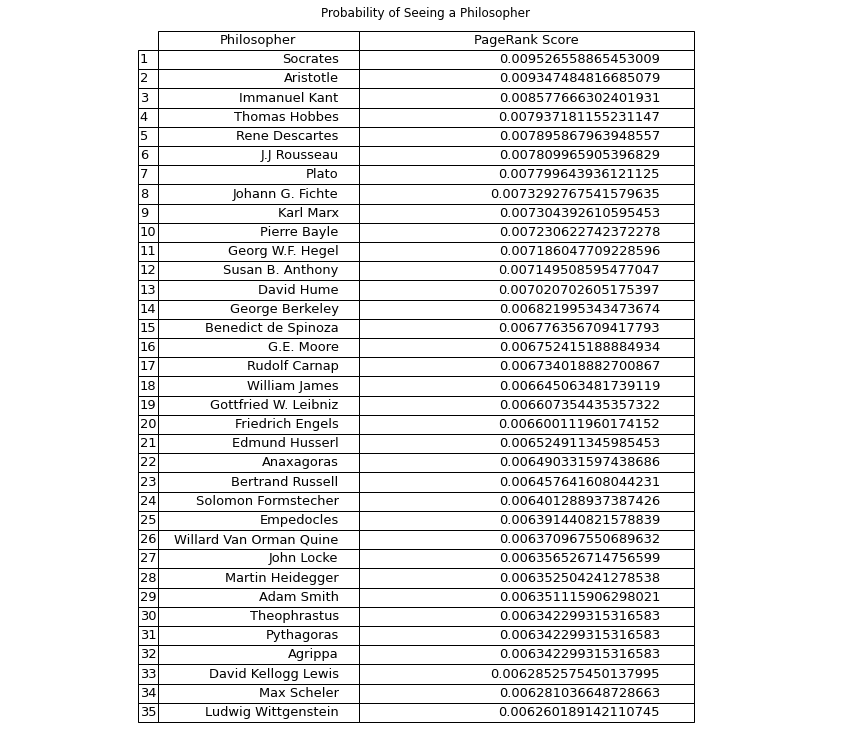

In [8]:
PR=nx.pagerank(G, alpha=0.3)
PageRanks=pd.DataFrame([(a,b) for a,b in zip(PR.keys(),PR.values())],columns=["Node","Page_R. Score"]).sort_values(by=["Page_R. Score"],ascending=False).head(35)
fig = plt.figure(figsize = (15,13))
ax = fig.add_subplot(111)

the_table = plt.table(cellText = PageRanks.values,
          rowLabels =  range(1,len(PageRanks.index)+1),
          colLabels =["Philosopher","PageRank Score"],
          loc = "center",
         colWidths = [0.15, 0.25],
         
         )

ax.set_title("Probability of Seeing a Philosopher")
the_table.set_fontsize(20)
the_table.scale(1.6, 1.6)
ax.axis("off");

* The result is quite satisfying for me. Before looking at this table, I have asked the question, in indegree centrality measurement, "Why Socrates is not higher on the list?" It was counter-intuitive to my background knowledge. However, as it turns out, the probability of coming across to a philosopher is not the same thing as the proportion of being referenced. I think this is an important lesson that can be taken from this table. By using this table, we can have an idea about the probabilities of seeing a philosopher.

### Closeness Centrality 
<hr>
<a href="https://en.wikipedia.org/wiki/Closeness_centrality">Definition:</a> 

* "In a connected graph, closeness centrality (or closeness) of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes."


* How we can use closeness centrality: <a href="https://neo4j.com/docs/graph-data-science/current/algorithms/closeness-centrality/#:~:text=Closeness%20centrality%20is%20a%20way,distances%20to%20all%20other%20nodes.">Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph.</a> 

 * This is plausible because if a node is close to other nodes, it's efficient(in the aspect of speed) to spread the information. However, there is a problem since these philosophers are not living in the same timeline, and these people are known; we can't use it. Why? If a philosopher had created an unusual idea, it would be already referenced, and that idea would have spread from that node. Therefore, that node would have higher closeness centrality. In the beginning, I thought it could give information about this, but then I have realized this fact. If you think it gives this kind of information or other information, let me know in the comment section.


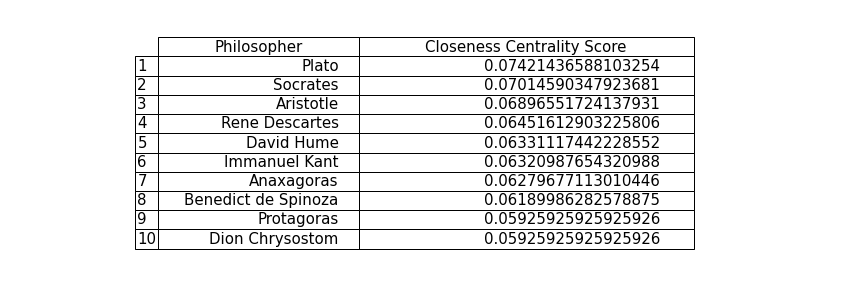

In [9]:
CC=nx.algorithms.centrality.closeness_centrality(G)
CCSorted=pd.DataFrame([(a,b) for a,b in zip(CC.keys(),CC.values())],columns=["Node","Closeness_C. Score"]).sort_values(by=["Closeness_C. Score"],ascending=False).head(10) 
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)

the_table = plt.table(cellText = CCSorted.values,
          rowLabels =  range(1,len(CCSorted.index)+1),
          colLabels =["Philosopher","Closeness Centrality Score"],
          loc = "center",
         colWidths = [0.15, 0.25],
         
         )

 
the_table.set_fontsize(15)
the_table.scale(1.6, 1.6)
ax.axis("off");

*For now, we will leave it because of the above reason.*

### Betweenness Centrality 
<hr>
<a href="https://en.wikipedia.org/wiki/Betweenness_centrality#:~:text=In%20graph%20theory%2C%20betweenness%20centrality,graph%20based%20on%20shortest%20paths.">Definition:</a>
* In graph theory, betweenness centrality (or "betweeness centrality") is a measure of centrality in a graph based on shortest paths. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex. 

* How we can use betweenness centrality: This centrality especially important for old philosophers because most of them historically either never written or their writings went missing. For example, this applies to almost all of the Presocratics and Socrates. Those never wrote; we know these either via Platon or Aristotle. Therefore, using this measurement, we can infer which philosophers are important for historically learning other philosophers. (This will not give us exact ratios since data is not including all the philosophers in history. Also, we haven't done chronologic filtering. However, these will not affect our ranking so much)

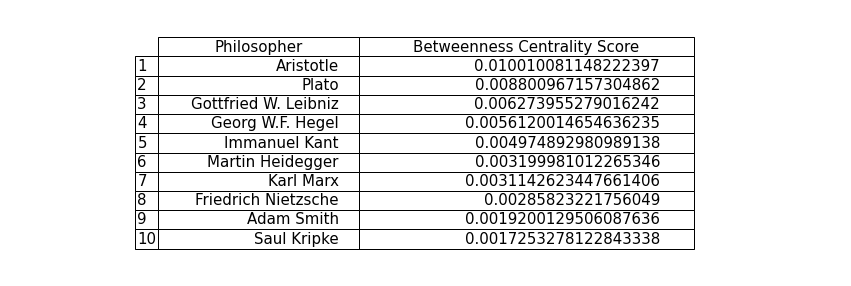

In [10]:
BC=nx.algorithms.centrality.betweenness_centrality(G)
BCsorted=pd.DataFrame([(a,b) for a,b in zip(BC.keys(),BC.values())],columns=["Node","BetweenessC. Score"]).sort_values(by=["BetweenessC. Score"],ascending=False).head(10) 

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)

the_table = plt.table(cellText = BCsorted.values,
          rowLabels =  range(1,len(BCsorted.index)+1),
          colLabels =["Philosopher","Betweenness Centrality Score"],
          loc = "center",
         colWidths = [0.15, 0.25],
         )

 
the_table.set_fontsize(15)
the_table.scale(1.6, 1.6)
ax.axis("off");

* This table is consistent with our thesis. As we see Aristotle's and Plato's score is quite higher than others because these are the ones that introduce us the Presocratics and Socrates. Also, another thing is as the score gets higher, the date gets older(generally).  

### Hub Authority Scores (HITS algorithm)
<hr>
* HITS algorithm might be seen as  one-sided version of the PageRank.
* <a href="https://en.wikipedia.org/wiki/HITS_algorithm">"A good hub represents a page that pointed to many other pages, while a good authority represents a page that is linked by many different hubs."</a>
* We will use this to see if there is a relationship between being a good authority and being a good hub.

p-value for pearson correlation:  (-0.00042125330824283107, 0.9957418601997017)


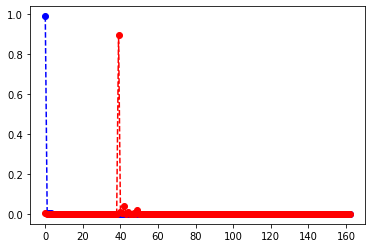

In [11]:
Hub,Auth=nx.hits(G)
Array=np.array(sorted(zip(Hub.values(),Auth.values()),key=itemgetter(0),reverse=True))
Sorted_H,Sorted_A=Array[:,0],Array[:,1]
plt.plot(Sorted_H,'--bo')
plt.plot(Sorted_A,'--ro')
print("p-value for pearson correlation: ",scipy.stats.pearsonr(Sorted_H,Sorted_A))

*It seems like there isn't*

## Undirected Graph
*Now we will look at undirected graph measurements*

In [12]:
 
##############################Undirected graph part for link predictions############################
G = nx.Graph()
G.add_nodes_from(Nodes)
G.add_weighted_edges_from(Edges)
UnconnectedNodes=[]
for a in JustAuthor:
    for b in JustAuthor:
        if a!=b:
            if ((a,b) not in [(a,b) for a,b,c in Edges]) and ((a,b) not in [(b,a) for a,b,c in Edges]) and ((b,a) not in UnconnectedNodes):
                UnconnectedNodes.append((a,b))

* We have extracted unconnected (yet) philosophers. Since we do not have all the books of a philosopher by looking at our network, we can't say these two philosophers haven't referred to each other. Therefore, we will look at which unconnected nodes have a higher probability of referring to each other in the books that we haven't included in our dataset.

### Preferential Attachment 
<hr>


* <a href="https://neo4j.com/docs/graph-algorithms/current/labs-algorithms/preferential-attachment/">Preferential attachment means that the more connected a node is, the more likely it is to receive new links. </a>
* If we apply this to our network, we can say the philosophers who have more connections(referred or referring, since our network is undirected) have a higher tendency to connect in the future too.

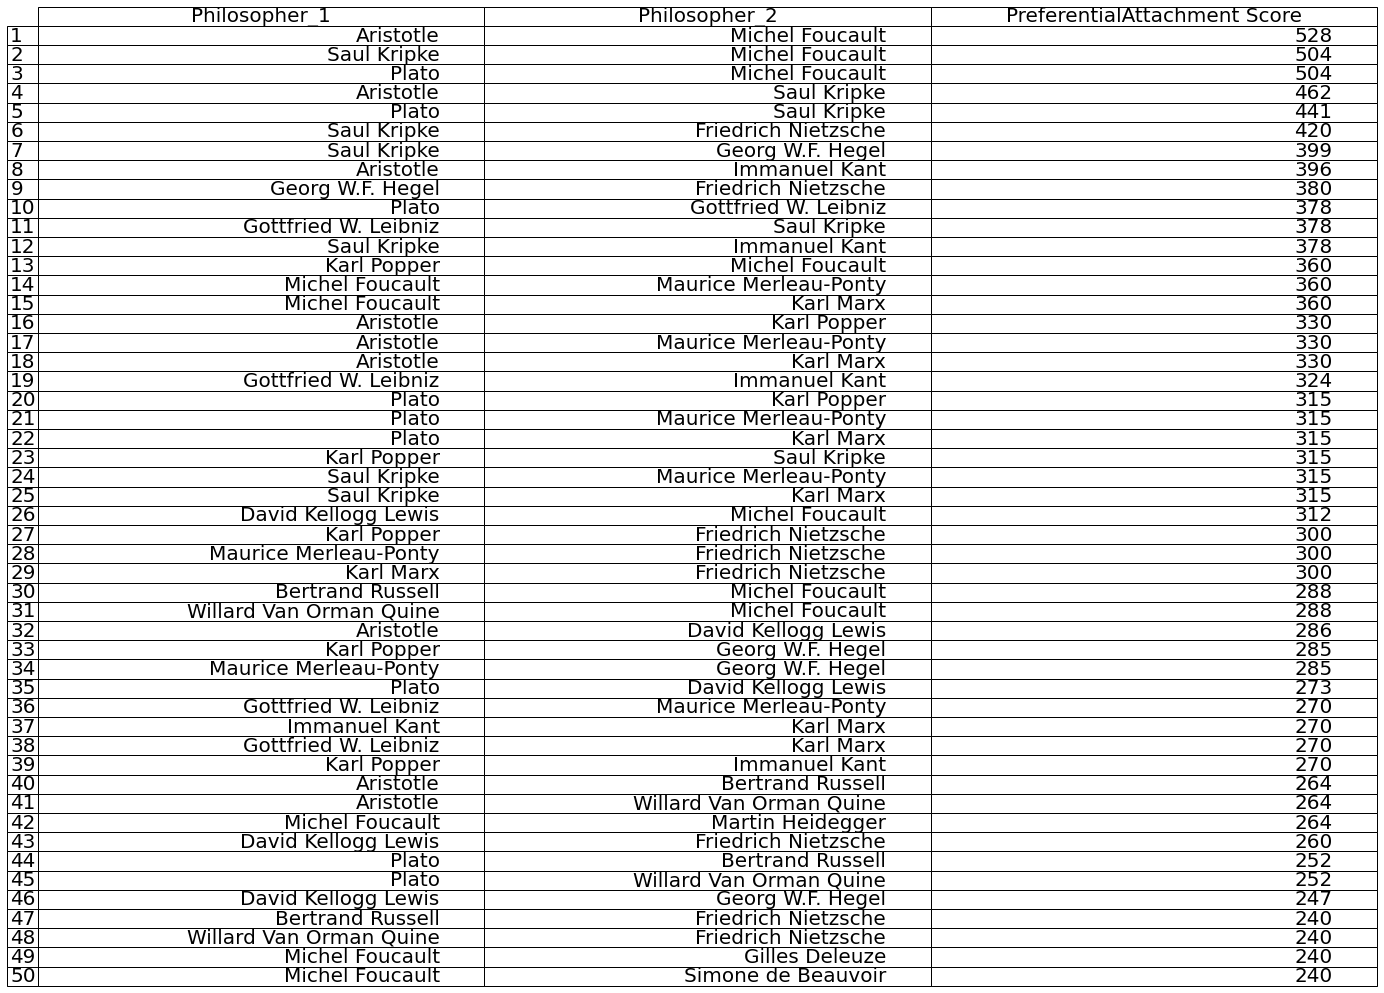

In [13]:
PreferentialAttachment=[]
for a,b,c in sorted(nx.preferential_attachment(G, UnconnectedNodes),key=itemgetter(2),reverse=True):
    PreferentialAttachment.append((a,b,c))
PDF=pd.DataFrame(PreferentialAttachment,columns=["Node1","Node2","Pref.A.Score"]).sort_values(by=["Pref.A.Score"],ascending=False).head(50)  
 
fig = plt.figure(figsize = (15,13))
ax = fig.add_subplot(111)

the_table = plt.table(cellText = PDF.values,
          rowLabels =  range(1,len(PDF.values[:,1])+1),
          colLabels =["Philosopher_1","Philosopher_2","PreferentialAttachment Score"],
          loc = "center"
         )

 
the_table.set_fontsize(20)
the_table.scale(1.6, 1.6)
ax.axis("off");
####Preferential Attachment can be used to create new edges ,thereby creating new graph.

* According to our table, we can make comparative predictions. For example, we can say seeing Michel Foucault referring to Aristotle(528) approximately two times more likely than seeing David Kellog Lewis referring to Friedrich Nietzsche(260). However, we should keep in mind this kind of prediction is not precisely accurate. This prediction method depends on the assumption, which says, "Preferential attachment means that the more connected a node is, the more likely it is to receive new links. And there isn't another factor that affects it."

### Jaccard Coefficient 
<hr>

* <a href="https://en.wikipedia.org/wiki/Jaccard_index#:~:text=The%20Jaccard%20coefficient%20measures%20similarity,A%2CB)%20%3D%201.">"The Jaccard coefficient measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets" <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/eaef5aa86949f49e7dc6b9c8c3dd8b233332c9e7"> </a>

<img src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Union_of_sets_A_and_B.svg/200px-Union_of_sets_A_and_B.svg.png"> <img src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Intersection_of_sets_A_and_B.svg/200px-Intersection_of_sets_A_and_B.svg.png">

* This is another method for link prediction. This time assumption is that if two philosophers have a proportionally(same neighbors/all neighbors) higher number of same neighbors, then these two philosophers have a higher chance of referring to each other.
* Intuition behind it can be thought of as the following example: Let's say Bertrand Russel reading a book of Hegel(In our graph, we can see these two philosophers are connected.) And in the book Hegel referring to Fichte(In or graph Russell and Fichte haven't connected yet). Since Bertrand Russell is reading that book, he will see the sentence that includes Fichte's view. After that, he started to another book from another philosopher and again have seen a view of Fichte. In some sense, when this kind of event accumulated, Bertrand Russell will tend to use Fichte's ideas by referring to him. Therefore the probability of seeing Bertrand Rusell linked with Fitche in the books that are not in our dataset will increase. 
* This kind of link prediction in our network (with my interpretation) depends on the following main assumption: 
 * Psychologically, people tend to use others' ideas when they see that idea so much. And since philosophers are trustworthy people, they will not forget to give references when using that idea.

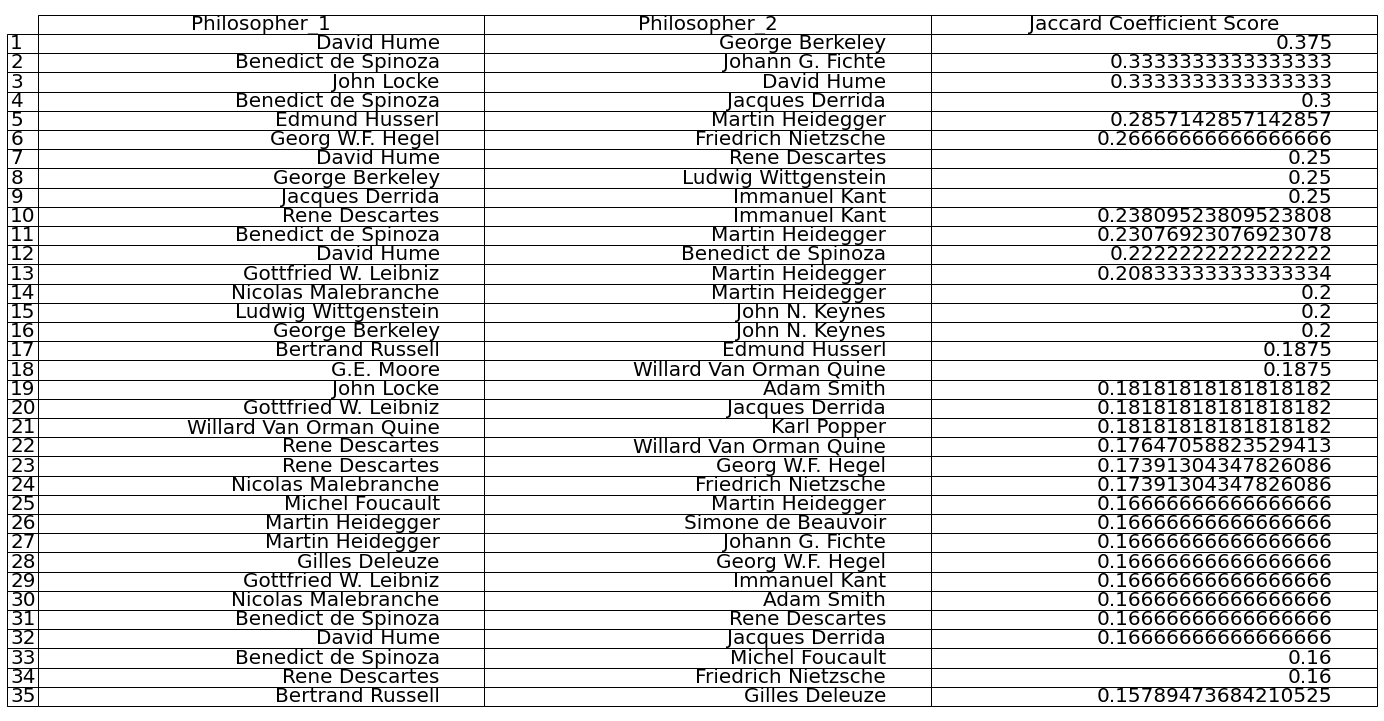

In [14]:
Jaccard_C=[]
for a,b,c in sorted(nx.jaccard_coefficient(G, UnconnectedNodes),key=itemgetter(2),reverse=True):
    Jaccard_C.append((a,b,c))
JDF=pd.DataFrame(Jaccard_C,columns=["Node1","Node2","Jaccard_C.Score"]).sort_values(by=["Jaccard_C.Score"],ascending=False).head(35)
 

fig = plt.figure(figsize = (15,13))
ax = fig.add_subplot(111)

the_table = plt.table(cellText = JDF.values,
          rowLabels =  range(1,len(JDF.values[:,1])+1),
          colLabels =["Philosopher_1","Philosopher_2","Jaccard Coefficient Score"],
          loc = "center"
         )

 
the_table.set_fontsize(20)
the_table.scale(1.6, 1.6)
ax.axis("off");

* With this approach, we can say the probability of having connections between Hume & Berkeley (0.375) two times more likely than having connections between H.E Moore and Quine (0.1875).

# Creating Comprehensive Interactive Graphs
<hr> 

* Now we will create two graphs to give insight to the user. In the <a href="https://www.kaggle.com/azxc9595/visual-graphs-of-philosophy">last notebook</a> I have created a network for each philosopher but this time we will create a comprehensive network which includes all the philosophers on the following projects we will combine these two idea. 

### Bokeh Graph

* Bokeh is a library that provides us tools to create interactive networks(Including java callbacks).

In [15]:
#####################################################(bokeh library) Interactive network graph################################################
###############################################Creating Network
 
G = nx.DiGraph()
G.add_nodes_from(Nodes)
 
for a,b,c in Edges:
    if c<3:
        G.add_edge(a,b,weight=1,width=1,color="dodgerblue")
    elif 10>c and c>3:
        G.add_edge(a,b,weight=3,width=3,color="blue")
    elif c>10 and 100>c:
        G.add_edge(a,b,weight=8,width=8,color="darkviolet")
    elif c>100:
        G.add_edge(a,b,weight=20,width=20,color="crimson")
         

pos = graphviz_layout(G, prog="dot")
Xs=[]
Ys=[]
Id=0
Labels=[c for c in pos.keys()]
Xs=[a for a,b in pos.values()]
Ys=[b for a,b in pos.values()]

 

MeanX=np.mean(Xs)
MeanY=np.mean(Ys)
CXs=[a-MeanX for a,b in pos.values()]
CYs=[b-MeanY for a,b in pos.values()]
 

Phil1=[]
NewXs1=[]
NewYs1=[]

Phil2=[]
NewXs2=[]
NewYs2=[]
 

Phil3=[]
NewXs3=[]
NewYs3=[]
 
Phil4=[]
NewXs4=[]
NewYs4=[]
constant=2.3
treshold=0
for a,b,c in zip(CXs,CYs,Labels): 
    if a>treshold and b>treshold:
        NewXs1.append(a+constant+MeanX)
        NewYs1.append(b+constant+4+MeanY)
        Phil1.append(c)
    elif a<treshold and b<treshold:
        NewXs2.append(a-constant-5+MeanX)
        NewYs2.append(b-constant-4+MeanY)
        Phil2.append(c)
    elif a<treshold and b>treshold:
        NewXs3.append(a-constant-100+MeanX)
        NewYs3.append(b+constant-2+MeanY)
        Phil3.append(c)
    elif a>treshold and b<treshold:
        NewXs4.append(a+constant-20+MeanX)
        NewYs4.append(b-constant-12+MeanY)
        Phil4.append(c)
 
    else:
        print(a,b)
 ###############################################Creating Network



 ###################################################Labels
from bokeh.models import ColumnDataSource, LabelSet
from math import pi 

source1 = ColumnDataSource({'x': NewXs1, 'y':NewYs1,'Philosophers':Phil1})
labels1 = LabelSet(x='x', y='y',angle=pi/4, text='Philosophers', source=source1,
                  background_fill_color='white')

source2 = ColumnDataSource({'x': NewXs2, 'y':NewYs2,'Philosophers':Phil2})
labels2 = LabelSet(x='x', y='y',angle=-pi/4, text='Philosophers', source=source2,
                  background_fill_color='white')

source3 = ColumnDataSource({'x': NewXs3, 'y':NewYs3,'Philosophers':Phil3})
labels3 = LabelSet(x='x', y='y',angle=pi/4, text='Philosophers', source=source3,
                  background_fill_color='white')

source4 = ColumnDataSource({'x': NewXs4, 'y':NewYs4,'Philosophers':Phil4})
labels4 = LabelSet(x='x', y='y',angle=-(pi)/4, text='Philosophers', source=source4,
                  background_fill_color='white')

 ###################################################Labels
    

from bokeh.io import output_file, show
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

plot = Plot(plot_width=1900, plot_height=1000,
            x_range=Range1d(min(Xs)-320,max(Xs)+900), y_range=Range1d(min(Ys)-70,max(Ys)+90))
plot.title.text = "Philosopher Citations" 
plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool()) 

graph_renderer = from_networkx(G,pos, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="color", line_alpha=0.1, line_width="width",)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color="color", line_width="width")
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color="color",line_width="width")

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = NodesAndLinkedEdges()

##################Arrow###############
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead
plot.add_layout(Arrow(end=NormalHead(line_color="black",line_width=4),x_start=max(Xs)+250, y_start=max(Ys)-150, x_end=max(Xs)+250, y_end=min(Ys)+40))
source = ColumnDataSource({'x': [max(Xs)-270,max(Xs)-250], 'y':[max(Ys)-145,min(Ys)+30],'Labels':["Philosopher who is Referring","Referenced Philosopher"]})
ArrowLabels = LabelSet(x='x', y='y', text='Labels', source=source,background_fill_color='white')
##################Arrow###############

 

 
plot.renderers.append(graph_renderer)
plot.renderers.append(ArrowLabels)
plot.renderers.append(labels1)
plot.renderers.append(labels2)
plot.renderers.append(labels3)
plot.renderers.append(labels4) 
output_file("/kaggle/working/interactive_complete_hierarchical.html")
from IPython.display import HTML
show(plot)
HTML(filename="/kaggle/working/interactive_complete_hierarchical.html")
HTML(filename="/kaggle/working/interactive_complete_hierarchical.html")

### Pyvis Graph 
* Pyvis is a library that provides us tools to create interactive like Bokeh, but it differently provides us physics options. With physics options, nodes and edges act like physical objects that attract and repel each other. (The drawback of this library is the poor documentation and scarcity of other interactiveness tools)

In [16]:
g=Network(bgcolor='#222222', font_color='green',height="100%",width="75%",directed=True)
 
g.toggle_hide_edges_on_drag(False)
g.from_nx(G)

g.set_edge_smooth('cubicBezier')
g.barnes_hut(
gravity=-80000,
central_gravity=0.5,
spring_length=20,
spring_strength=0.01,
damping=1,
overlap=-20,
) 
 
#g.show_buttons()
#g.show('nx.html')

* Kaggle notebook does not support displaying pyviz HTML; therefore, I have added this HTML as input. If you want to see you can download it.

# Conclusion
* All of the results in section one should be questioned with one's general background knowledge of philosophy. If there is a mistake or other information that can be extracted, please let me know in the comment section. (Also, I would like to hear other interpretations about these centrality measures.)
* This analysis will continue with different ideas. The last time we talked with Kourosh, it was quite fruitful in the abundance of ideas. However, these days all things have piled up, so it will take a while for the next project.